In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
df=pd.read_csv('../data/Diabetes.csv')

In [297]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [298]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [300]:
# let's check the number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [301]:
# let's see the duplicates values
df.duplicated().sum()

np.int64(0)

In [302]:
# Statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [303]:
# Replase zeros in specific columns with the median of those columns

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

In [304]:
df.head(40)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


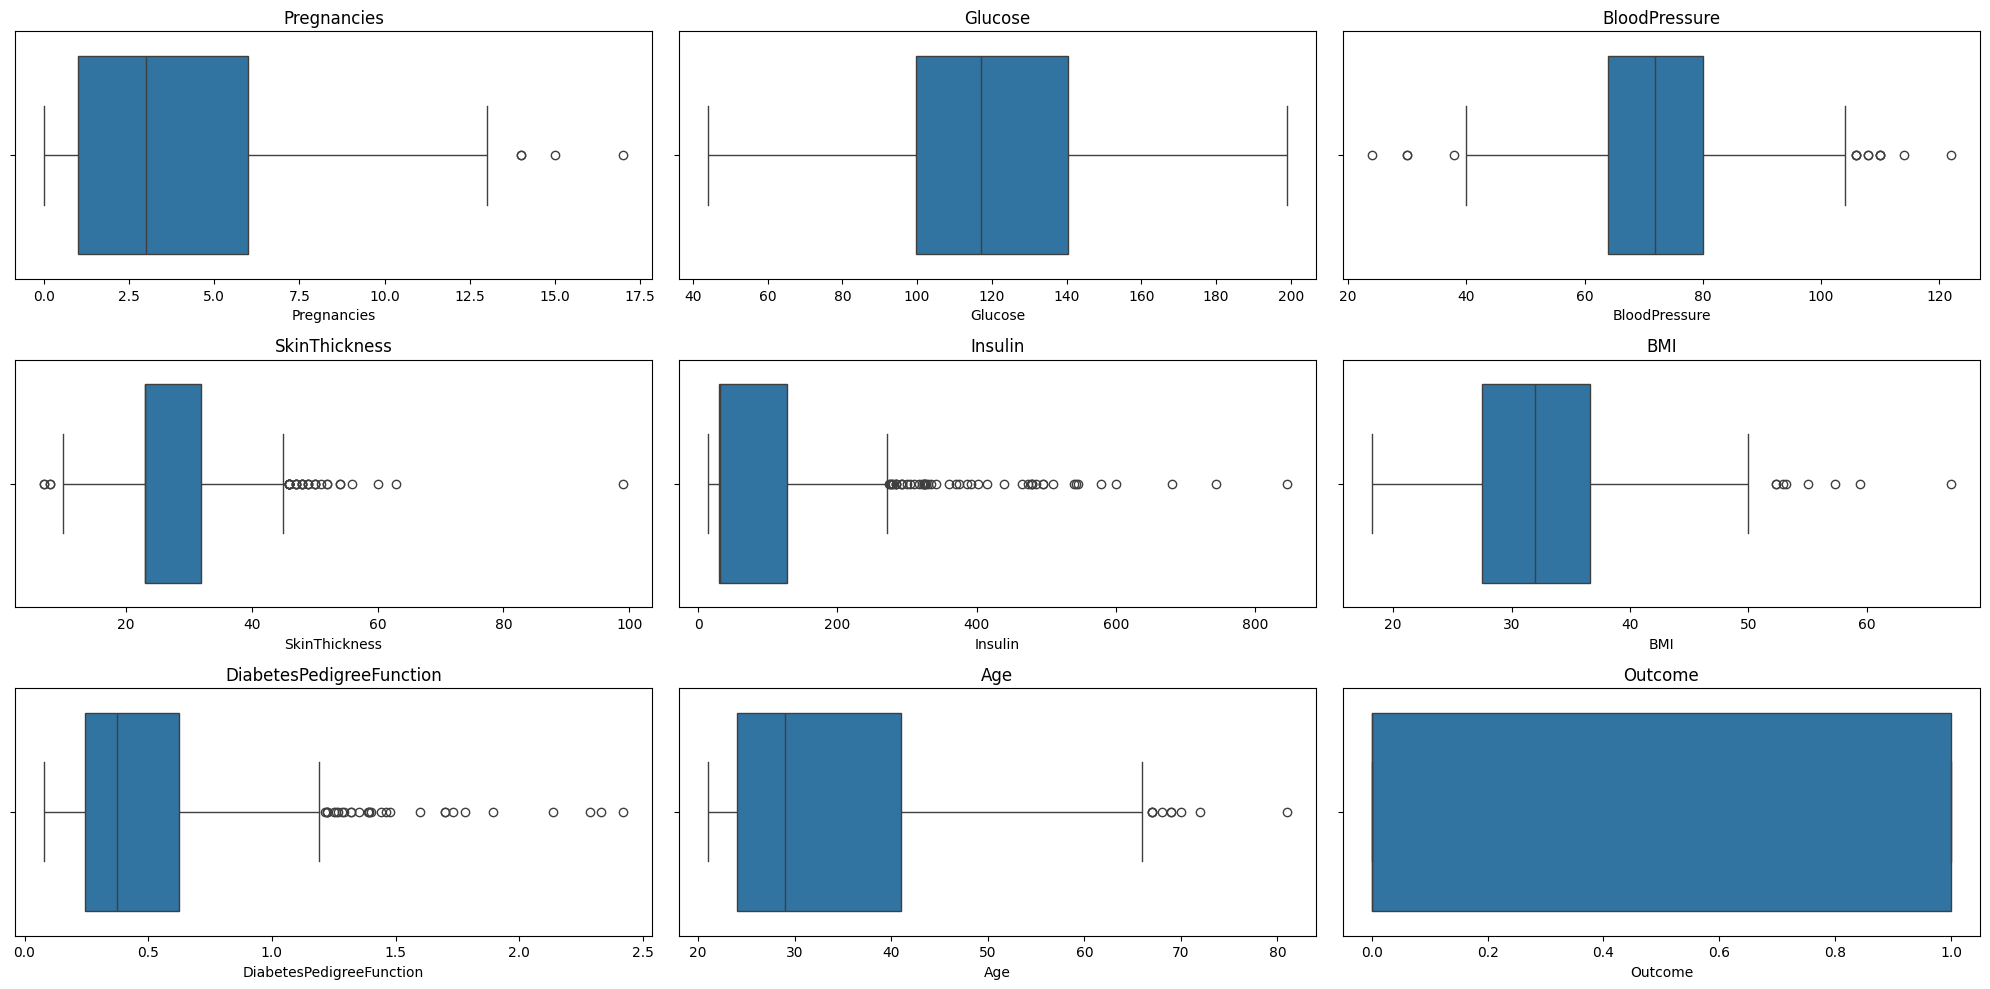

In [305]:
# Lets visualize the outliers using boxplot for all the columns using a function
def boxplot(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)  # 3x3 grid for 9 columns
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    
boxplot(df)

In [306]:
# Lets count the number of outliers in each column
def count_outliers(df):
    outliers_count = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    return outliers_count
outliers_count = count_outliers(df)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")
    

Number of outliers in each column:
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 35 outliers
Insulin: 49 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


In [307]:
# Now lets handel the outliers using IQR method form the dataframe
def remove_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df)




In [308]:
# let's again check the number of outliers in each column after removing themoutliers_count_after = count_outliers(df)
outliers_count_after = count_outliers(df)
print("Number of outliers in each column after removing them:")
for col, count in outliers_count_after.items():
    print(f"{col}: {count} outliers")
    

    

Number of outliers in each column after removing them:
Pregnancies: 0 outliers
Glucose: 16 outliers
BloodPressure: 5 outliers
SkinThickness: 11 outliers
Insulin: 21 outliers
BMI: 1 outliers
DiabetesPedigreeFunction: 7 outliers
Age: 7 outliers
Outcome: 0 outliers


In [309]:
# For remaining outliers, we can use capping method
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

df = cap_outliers(df)


In [310]:
# let's again check the number of outliers in each column after removing 
outliers_count_after = count_outliers(df)
print("Number of outliers in each column after removing them:")
for col, count in outliers_count_after.items():
    print(f"{col}: {count} outliers")
    

Number of outliers in each column after removing them:
Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 0 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 0 outliers
Age: 0 outliers
Outcome: 0 outliers


In [311]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30.0,0.0


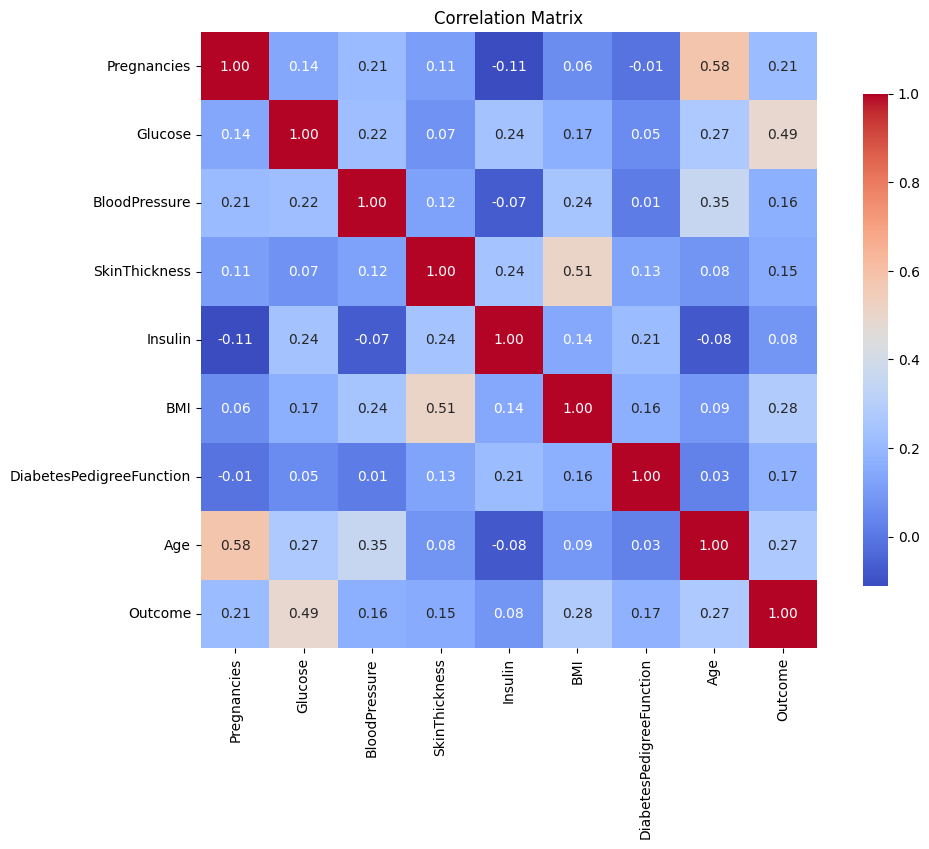

In [312]:
# now lets use the correlation matrix to see the correlation between the columns

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


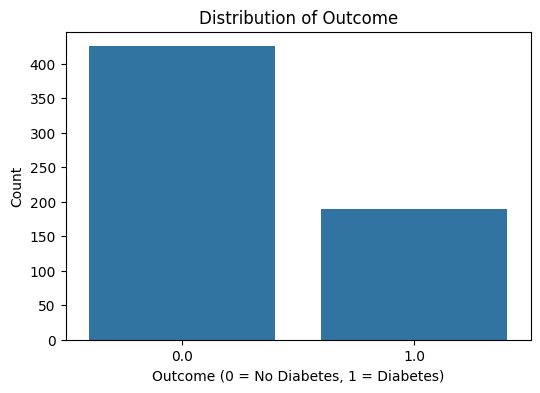

Outoff the total number of patients: 615
Number of patients with diabetes (1): 190
Number of patients without diabetes (0): 425


In [313]:
# Count plot for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# show the number of patients with diabetes and without diabetes
diabetes_counts = df['Outcome'].value_counts()
print('Outoff the total number of patients:', len(df))
print("Number of patients with diabetes (1):", diabetes_counts[1])
print("Number of patients without diabetes (0):", diabetes_counts[0])



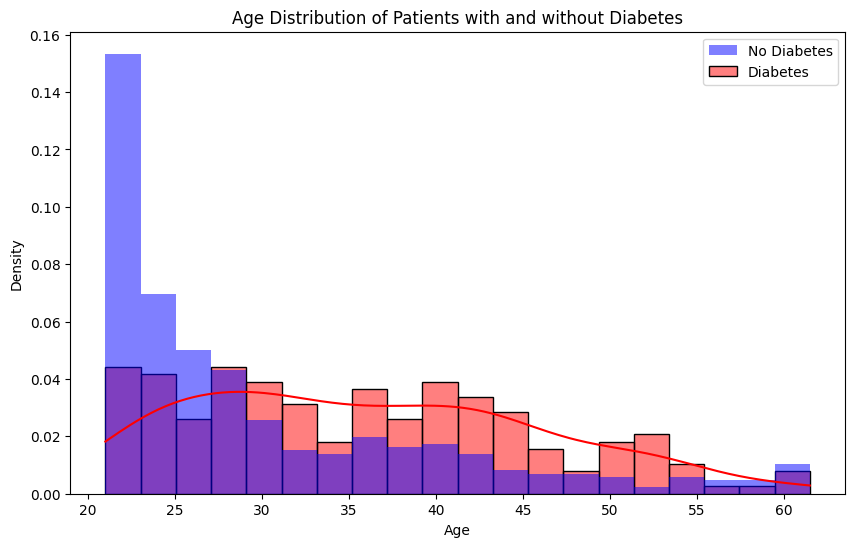

In [314]:
# Lets visualize the how many patients are having diabetes based on the age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Outcome'] == 1]['Age'], bins=20, kde=True, color='red', label='Diabetes', stat='density')
plt.hist(df[df['Outcome'] == 0]['Age'], bins=20, alpha=0.5, color='blue', label='No Diabetes', density=True)
plt.title('Age Distribution of Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()



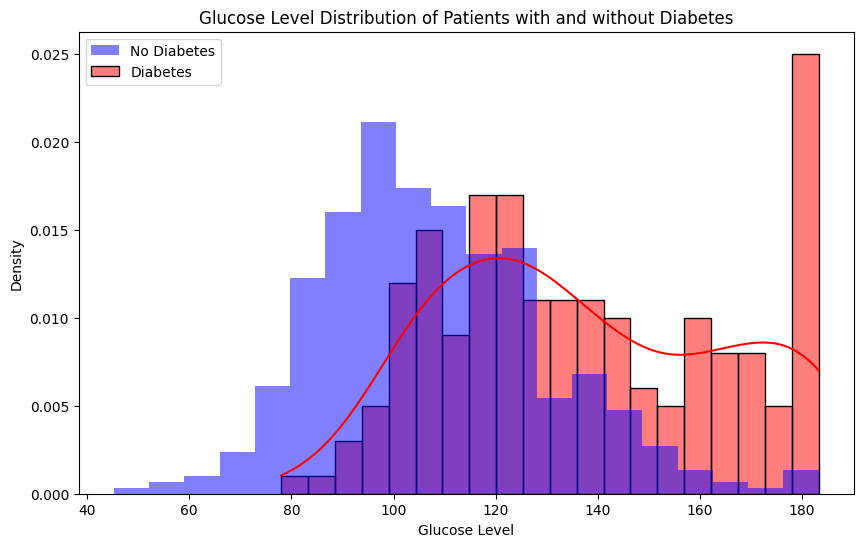

In [315]:
# Visualize the gulucose level distribution for patients with and without diabetes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Outcome'] == 1]['Glucose'], bins=20, kde=True, color='red', label='Diabetes', stat='density')
plt.hist(df[df['Outcome'] == 0]['Glucose'], bins=20, alpha=0.5, color='blue', label='No Diabetes', density=True)
plt.title('Glucose Level Distribution of Patients with and without Diabetes')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.legend()
plt.show()

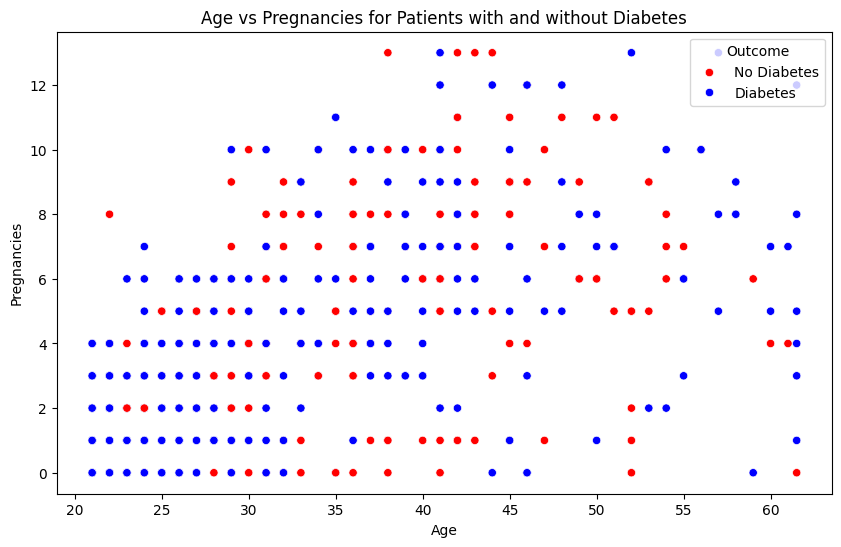

In [316]:
# Age and Pregnancies  visualization for patients with and without diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Age vs Pregnancies for Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()



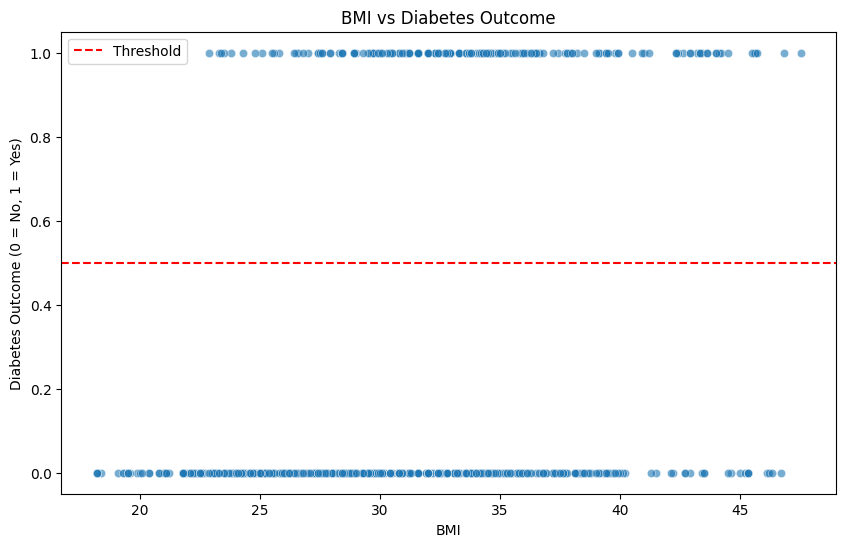

In [317]:
# Visualize the relationship between BMI and Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Outcome', data=df, alpha=0.6)
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()


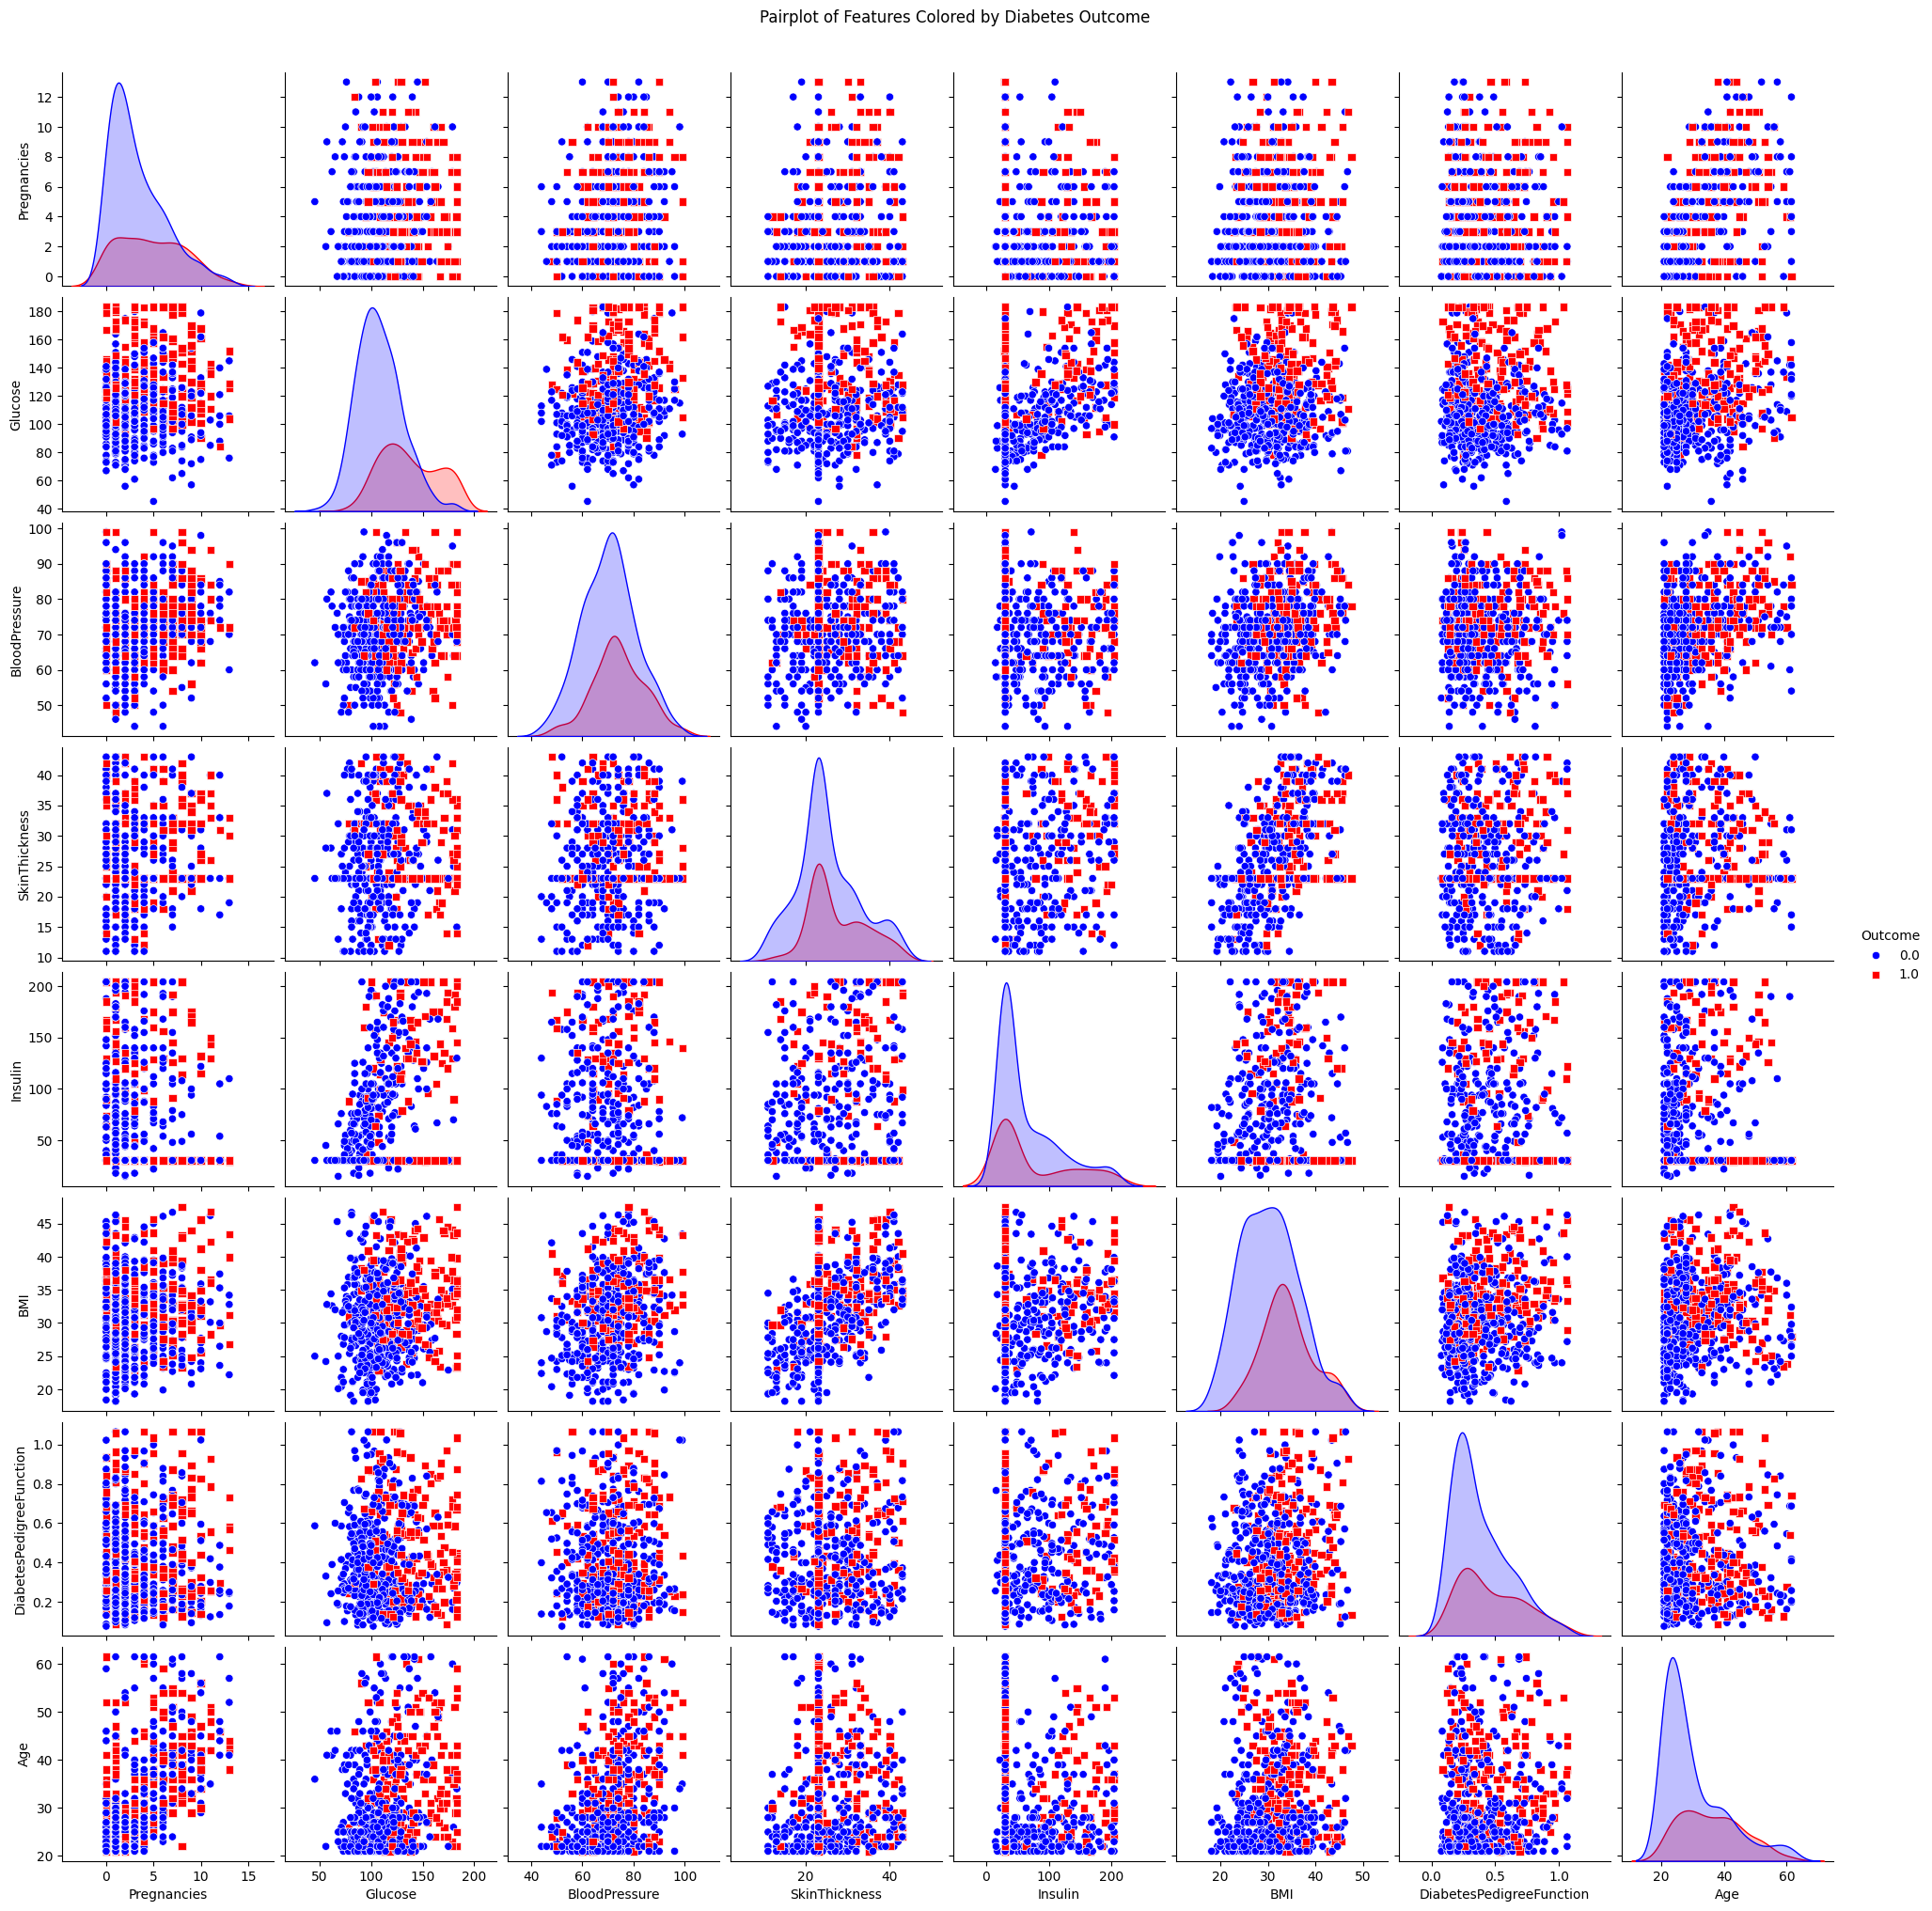

In [318]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Features Colored by Diabetes Outcome', y=1.02)
plt.show()

In [319]:
# Convert columns to appropriate df types
df['Pregnancies'] = df['Pregnancies'].astype('int64')
df['Glucose'] = pd.to_numeric(df['Glucose'], errors='coerce').astype('float64')
df['BloodPressure'] = pd.to_numeric(df['BloodPressure'], errors='coerce').astype('float64')
df['SkinThickness'] = pd.to_numeric(df['SkinThickness'], errors='coerce').astype('float64')
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce').astype('float64')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce').astype('float64')
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['DiabetesPedigreeFunction'], errors='coerce').astype('float64')
df['Age'] = df['Age'].astype('int64')
df['Outcome'] = df['Outcome'].astype('int64')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               615 non-null    int64  
 1   Glucose                   615 non-null    float64
 2   BloodPressure             615 non-null    float64
 3   SkinThickness             615 non-null    float64
 4   Insulin                   615 non-null    float64
 5   BMI                       615 non-null    float64
 6   DiabetesPedigreeFunction  615 non-null    float64
 7   Age                       615 non-null    int64  
 8   Outcome                   615 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 48.0 KB


In [321]:
# Now shave the cleaned dataset to a new CSV file
df.to_csv('../data/Diabetes_Cleaned.csv', index=False)